# Tensor Flow

In [1]:
import tensorflow as tf
import numpy as np

2023-05-19 15:54:38.534105: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Constant Tensors

In [50]:
t = tf.constant(3)
display(t.numpy())
display(t.dtype)
display(t.shape)

3

tf.int32

TensorShape([])

In [49]:
t = tf.constant([1, 2, 3])
display(t.numpy())
display(t.dtype)
display(t.shape)

array([1, 2, 3], dtype=int32)

tf.int32

TensorShape([3])

In [51]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
display(t.numpy())
display(t.dtype)
display(t.shape)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

tf.int32

TensorShape([2, 3])

In [52]:
x1 = tf.constant([1, 2, 3])
x2 = tf.stack([x1, x1])
x3 = tf.stack([x2, x2])
tf.stack([x3, x3, x3])

<tf.Tensor: shape=(3, 2, 2, 3), dtype=int32, numpy=
array([[[[1, 2, 3],
         [1, 2, 3]],

        [[1, 2, 3],
         [1, 2, 3]]],


       [[[1, 2, 3],
         [1, 2, 3]],

        [[1, 2, 3],
         [1, 2, 3]]],


       [[[1, 2, 3],
         [1, 2, 3]],

        [[1, 2, 3],
         [1, 2, 3]]]], dtype=int32)>

### Slicing

In [6]:
x = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])
x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [7]:
tf.shape(x)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 3], dtype=int32)>

In [8]:
x[:, 1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 5], dtype=int32)>

### Reshape

In [9]:
tf.reshape(x, (3, 2))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

## Variable Tensors

The shape and type of the variable tensor it's constant and doesn't change once defined. What is variable, are the values in it.

In [10]:
var = tf.Variable(2)
var

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [11]:
var.assign(5)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=5>

In [12]:
var.assign_add(2)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=7>

In [13]:
var.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>

## Matrix multiplication

In [14]:
# w * x

In [15]:
w = tf.Variable([[1], [2]], dtype=np.float32)
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

In [16]:
x = tf.constant([[3, 4]], dtype=np.float32)
x

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[3., 4.]], dtype=float32)>

In [53]:
tf.matmul(w, x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3., 4.],
       [6., 8.]], dtype=float32)>

## Dataset

In [69]:
t = tf.constant([[8, 16, 24], [7, 5, 3]])
t.numpy(), t.numpy().shape

(array([[ 8, 16, 24],
        [ 7,  5,  3]], dtype=int32),
 (2, 3))

In [73]:
ds = tf.data.Dataset.from_tensors(t)
[x for x in ds]

2023-05-19 16:12:00.723307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [2,3]
	 [[{{node Placeholder/_0}}]]


[<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 8, 16, 24],
        [ 7,  5,  3]], dtype=int32)>]

In [75]:
ds = tf.data.Dataset.from_tensor_slices(t)
[x for x in ds]

2023-05-19 16:12:09.084594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [2,3]
	 [[{{node Placeholder/_0}}]]


[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 8, 16, 24], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([7, 5, 3], dtype=int32)>]

In [79]:
t1 = tf.constant([[1, 3, 5, 7, 9], [0, 0, 0, 0, 0]])
t2 = tf.constant([[0, 2, 4, 6, 8], [1, 1, 1, 1, 1]])
ds = tf.data.Dataset.from_tensors((t1, t2))
[x for x in ds]

2023-05-19 16:15:54.681671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [2,5]
	 [[{{node Placeholder/_1}}]]


[(<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
  array([[1, 3, 5, 7, 9],
         [0, 0, 0, 0, 0]], dtype=int32)>,
  <tf.Tensor: shape=(2, 5), dtype=int32, numpy=
  array([[0, 2, 4, 6, 8],
         [1, 1, 1, 1, 1]], dtype=int32)>)]

In [80]:
t1 = tf.constant([[1, 3, 5, 7, 9], [0, 0, 0, 0, 0]])
t2 = tf.constant([[0, 2, 4, 6, 8], [1, 1, 1, 1, 1]])
ds = tf.data.Dataset.from_tensor_slices((t1, t2))
[x for x in ds]

2023-05-19 16:16:20.307262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [2,5]
	 [[{{node Placeholder/_1}}]]


[(<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9], dtype=int32)>,
  <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>),
 (<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0], dtype=int32)>,
  <tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1], dtype=int32)>)]

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [82]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [83]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [102]:
dataset = raw_dataset.copy()
dataset.tail()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [103]:
dataset = dataset.dropna()

In [104]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [107]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [108]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [113]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [114]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [134]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

In [135]:
train_dataset.shape[0] / dataset.shape[0]

0.8010204081632653

In [136]:
test_dataset.shape[0] / dataset.shape[0]

0.1989795918367347

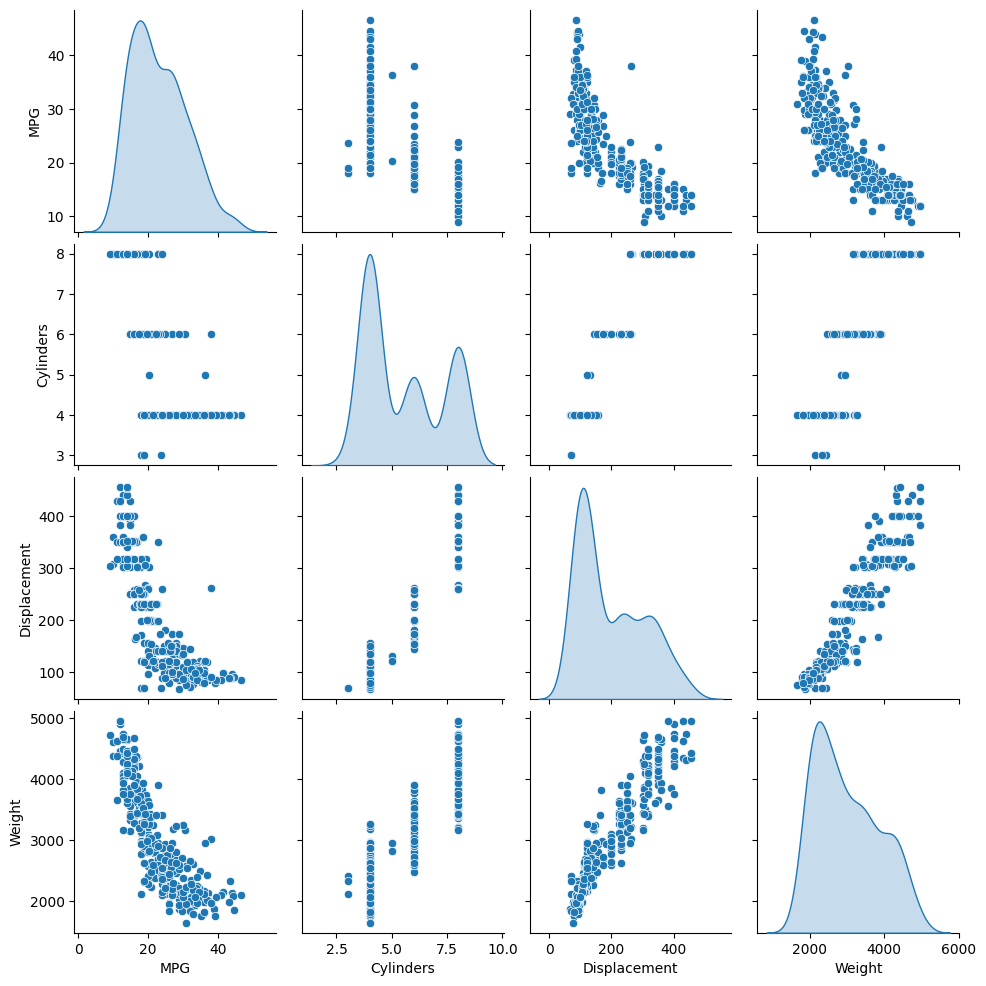

In [137]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [138]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.153822,7.861854,9.0,17.000,22.0,28.075,46.6
Cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.000,8.0
Displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.000,455.0
Horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.000,230.0
Weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.750,4955.0
Acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.000,24.8
Model Year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.000,82.0
Europe,314.0,0.171975,0.377961,0.0,0.000,0.0,0.000,1.0
Japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.000,1.0
USA,314.0,0.624204,0.485101,0.0,0.000,1.0,1.000,1.0


In [139]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')